- author: Lee Meng
- date: 2020-09-11 16:00
- title: Hahow Pandas Workspace
- slug: hahow-pandas
- tags: 資料科學, Python, pandas
- description: 
- image: nick-hillier-yD5rv8_WzxA-unsplash.jpg
- image_credit_url: 
- status: draft

將接近 40 個實用的 pandas 技巧由淺入深地分成 6 大類別：
1. [建立 DataFrame](#建立-DataFrame)
2. [客製化 DataFrame 顯示設定](#客製化-DataFrame-顯示設定_1)
3. [數據清理 & 整理](#數據清理-&-整理_1)
4. [取得想要關注的數據](#取得想要關注的數據_1)
5. [基本數據處理與轉換](#基本數據處理與轉換_1)
6. [簡單匯總 & 分析數據](#簡單匯總-&-分析數據_1)


# [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html#min)
- https://pandas.pydata.org/docs/user_guide/10min.html#min

In [1]:
import numpy as np
import pandas as pd
pd.__version__

'1.1.2'

## Object creation

In [66]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [67]:
date = pd.date_range('20130101', periods=6)
date

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [68]:
df = pd.DataFrame(np.random.randn(6, 4), index=date, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.607013,-0.606191,-1.794292,-0.353107
2013-01-02,0.949909,2.004353,1.160331,-0.960916
2013-01-03,0.101864,-0.127313,-0.540541,0.338675
2013-01-04,0.745846,0.182203,-2.515645,1.006620
2013-01-05,-0.227424,1.019979,0.347778,1.458274
2013-01-06,1.653608,-2.246206,1.150773,-0.442323


In [69]:
df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20200913'),
    'C': pd.Series(5, index=list(range(4)), dtype='float32'),
    'D': np.array([2] * 4, dtype='int32'),
    'E': pd.Categorical(['train', 'test'] * 2),
    'F': 'Yo'
})
df2

,A,B,C,D,E,F
0,1.0,2020-09-13,5.0,2,train,Yo
1,1.0,2020-09-13,5.0,2,test,Yo
2,1.0,2020-09-13,5.0,2,train,Yo
3,1.0,2020-09-13,5.0,2,test,Yo


In [70]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

In [71]:
df2.head() # df.tail()

,A,B,C,D,E,F
0,1.0,2020-09-13,5.0,2,train,Yo
1,1.0,2020-09-13,5.0,2,test,Yo
2,1.0,2020-09-13,5.0,2,train,Yo
3,1.0,2020-09-13,5.0,2,test,Yo


In [72]:
df2.index # df.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [74]:
df2.index = pd.date_range('20200913', periods=df2.index.size)
df2.index

DatetimeIndex(['2020-09-13', '2020-09-14', '2020-09-15', '2020-09-16'], dtype='datetime64[ns]', freq='D')

In [75]:
df.to_numpy()

array([[ 1.60701278, -0.60619109, -1.79429157, -0.35310702],
       [ 0.94990932,  2.00435303,  1.1603309 , -0.96091587],
       [ 0.10186365, -0.12731272, -0.54054077,  0.33867545],
       [ 0.74584567,  0.18220302, -2.51564452,  1.00661959],
       [-0.22742367,  1.01997864,  0.34777848,  1.45827367],
       [ 1.65360757, -2.24620584,  1.15077324, -0.44232284]])

In [76]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.805136,0.037804,-0.365266,0.174537
std,0.767875,1.449933,1.538260,0.929027
min,-0.227424,-2.246206,-2.515645,-0.960916
25%,0.262859,-0.486472,-1.480854,-0.420019
50%,0.847877,0.027445,-0.096381,-0.007216
75%,1.442737,0.810535,0.950025,0.839634
max,1.653608,2.004353,1.160331,1.458274


In [77]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.607013,0.949909,0.101864,0.745846,-0.227424,1.653608
B,-0.606191,2.004353,-0.127313,0.182203,1.019979,-2.246206
C,-1.794292,1.160331,-0.540541,-2.515645,0.347778,1.150773
D,-0.353107,-0.960916,0.338675,1.006620,1.458274,-0.442323


In [78]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.353107,-1.794292,-0.606191,1.607013
2013-01-02,-0.960916,1.160331,2.004353,0.949909
2013-01-03,0.338675,-0.540541,-0.127313,0.101864
2013-01-04,1.006620,-2.515645,0.182203,0.745846
2013-01-05,1.458274,0.347778,1.019979,-0.227424
2013-01-06,-0.442323,1.150773,-2.246206,1.653608


In [79]:
df.sort_values(by='D')

,A,B,C,D
2013-01-02,0.949909,2.004353,1.160331,-0.960916
2013-01-06,1.653608,-2.246206,1.150773,-0.442323
2013-01-01,1.607013,-0.606191,-1.794292,-0.353107
2013-01-03,0.101864,-0.127313,-0.540541,0.338675
2013-01-04,0.745846,0.182203,-2.515645,1.006620
2013-01-05,-0.227424,1.019979,0.347778,1.458274


## Selection

- production 時推薦使用 .loc, .iloc 等 methods

### Getting

In [80]:
df['A'] # df.A

2013-01-01    1.607013
2013-01-02    0.949909
2013-01-03    0.101864
2013-01-04    0.745846
2013-01-05   -0.227424
2013-01-06    1.653608
Freq: D, Name: A, dtype: float64

In [81]:
df['2020-09-14':'2020-09-15']  #row-wise

,A,B,C,D


### Selection by Label

In [82]:
date[0]

Timestamp('2013-01-01 00:00:00', freq='D')

In [83]:
df

,A,B,C,D
2013-01-01,1.607013,-0.606191,-1.794292,-0.353107
2013-01-02,0.949909,2.004353,1.160331,-0.960916
2013-01-03,0.101864,-0.127313,-0.540541,0.338675
2013-01-04,0.745846,0.182203,-2.515645,1.006620
2013-01-05,-0.227424,1.019979,0.347778,1.458274
2013-01-06,1.653608,-2.246206,1.150773,-0.442323


In [84]:
df.loc[date[0]]

A    1.607013
B   -0.606191
C   -1.794292
D   -0.353107
Name: 2013-01-01 00:00:00, dtype: float64

In [85]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,1.607013,-0.606191
2013-01-02,0.949909,2.004353
2013-01-03,0.101864,-0.127313
2013-01-04,0.745846,0.182203
2013-01-05,-0.227424,1.019979
2013-01-06,1.653608,-2.246206


In [88]:
df.loc['2013-01-03':'2013-01-04', ['B', 'C']]

,B,C
2013-01-03,-0.127313,-0.540541
2013-01-04,0.182203,-2.515645


In [91]:
%timeit df.at[date[0], 'B']

12.2 µs ± 290 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [92]:
%timeit df.loc[date[0], 'B']

14.9 µs ± 930 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Select by Position

In [93]:
df

,A,B,C,D
2013-01-01,1.607013,-0.606191,-1.794292,-0.353107
2013-01-02,0.949909,2.004353,1.160331,-0.960916
2013-01-03,0.101864,-0.127313,-0.540541,0.338675
2013-01-04,0.745846,0.182203,-2.515645,1.006620
2013-01-05,-0.227424,1.019979,0.347778,1.458274
2013-01-06,1.653608,-2.246206,1.150773,-0.442323


In [94]:
df.iloc[:2]  # row

,A,B,C,D
2013-01-01,1.607013,-0.606191,-1.794292,-0.353107
2013-01-02,0.949909,2.004353,1.160331,-0.960916


In [99]:
df.iloc[:, [1, 3]]

,B,D
2013-01-01,-0.606191,-0.353107
2013-01-02,2.004353,-0.960916
2013-01-03,-0.127313,0.338675
2013-01-04,0.182203,1.006620
2013-01-05,1.019979,1.458274
2013-01-06,-2.246206,-0.442323


In [100]:
%timeit df.iloc[1, 1]

15.8 µs ± 863 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [101]:
%timeit df.iat[1, 1]

14 µs ± 869 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Boolean Indexing

In [104]:
df[df['A'] > 1]

,A,B,C,D
2013-01-01,1.607013,-0.606191,-1.794292,-0.353107
2013-01-06,1.653608,-2.246206,1.150773,-0.442323


In [105]:
df[df > 1]

,A,B,C,D
2013-01-01,1.607013,NaN,NaN,NaN
2013-01-02,NaN,2.004353,1.160331,NaN
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,1.006620
2013-01-05,NaN,1.019979,NaN,1.458274
2013-01-06,1.653608,NaN,1.150773,NaN


In [108]:
df2[df2['E'].isin(['train'])]

,A,B,C,D,E,F
2020-09-13,1.0,2020-09-13,5.0,2,train,Yo
2020-09-15,1.0,2020-09-13,5.0,2,train,Yo


In [109]:
df2[df2['E'] == 'train']

,A,B,C,D,E,F
2020-09-13,1.0,2020-09-13,5.0,2,train,Yo
2020-09-15,1.0,2020-09-13,5.0,2,train,Yo


### Setting

In [110]:
df

,A,B,C,D
2013-01-01,1.607013,-0.606191,-1.794292,-0.353107
2013-01-02,0.949909,2.004353,1.160331,-0.960916
2013-01-03,0.101864,-0.127313,-0.540541,0.338675
2013-01-04,0.745846,0.182203,-2.515645,1.006620
2013-01-05,-0.227424,1.019979,0.347778,1.458274
2013-01-06,1.653608,-2.246206,1.150773,-0.442323


In [113]:
s1 = pd.Series(range(2, 8), index=pd.date_range('2013-01-02', periods=6))
s1

2013-01-02    2
2013-01-03    3
2013-01-04    4
2013-01-05    5
2013-01-06    6
2013-01-07    7
Freq: D, dtype: int64

In [114]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,1.607013,-0.606191,-1.794292,-0.353107,NaN
2013-01-02,0.949909,2.004353,1.160331,-0.960916,2.0
2013-01-03,0.101864,-0.127313,-0.540541,0.338675,3.0
2013-01-04,0.745846,0.182203,-2.515645,1.006620,4.0
2013-01-05,-0.227424,1.019979,0.347778,1.458274,5.0
2013-01-06,1.653608,-2.246206,1.150773,-0.442323,6.0


In [116]:
df.at['2013-01-03', 'A'] = 0
df

,A,B,C,D,F
2013-01-01,1.607013,-0.606191,-1.794292,-0.353107,NaN
2013-01-02,0.949909,2.004353,1.160331,-0.960916,2.0
2013-01-03,0.000000,-0.127313,-0.540541,0.338675,3.0
2013-01-04,0.745846,0.182203,-2.515645,1.006620,4.0
2013-01-05,-0.227424,1.019979,0.347778,1.458274,5.0
2013-01-06,1.653608,-2.246206,1.150773,-0.442323,6.0


In [117]:
df.iat[3, 1] = 0
df

,A,B,C,D,F
2013-01-01,1.607013,-0.606191,-1.794292,-0.353107,NaN
2013-01-02,0.949909,2.004353,1.160331,-0.960916,2.0
2013-01-03,0.000000,-0.127313,-0.540541,0.338675,3.0
2013-01-04,0.745846,0.000000,-2.515645,1.006620,4.0
2013-01-05,-0.227424,1.019979,0.347778,1.458274,5.0
2013-01-06,1.653608,-2.246206,1.150773,-0.442323,6.0


In [118]:
df2 = df.copy()
df2[df2 > 0]

,A,B,C,D,F
2013-01-01,1.607013,NaN,NaN,NaN,NaN
2013-01-02,0.949909,2.004353,1.160331,NaN,2.0
2013-01-03,NaN,NaN,NaN,0.338675,3.0
2013-01-04,0.745846,NaN,NaN,1.006620,4.0
2013-01-05,NaN,1.019979,0.347778,1.458274,5.0
2013-01-06,1.653608,NaN,1.150773,NaN,6.0


In [119]:
df2[df2 > 0] = 1000
df2

,A,B,C,D,F
2013-01-01,1000.000000,-0.606191,-1.794292,-0.353107,NaN
2013-01-02,1000.000000,1000.000000,1000.000000,-0.960916,1000.0
2013-01-03,0.000000,-0.127313,-0.540541,1000.000000,1000.0
2013-01-04,1000.000000,0.000000,-2.515645,1000.000000,1000.0
2013-01-05,-0.227424,1000.000000,1000.000000,1000.000000,1000.0
2013-01-06,1000.000000,-2.246206,1000.000000,-0.442323,1000.0


## Missing Data

In [120]:
df

,A,B,C,D,F
2013-01-01,1.607013,-0.606191,-1.794292,-0.353107,NaN
2013-01-02,0.949909,2.004353,1.160331,-0.960916,2.0
2013-01-03,0.000000,-0.127313,-0.540541,0.338675,3.0
2013-01-04,0.745846,0.000000,-2.515645,1.006620,4.0
2013-01-05,-0.227424,1.019979,0.347778,1.458274,5.0
2013-01-06,1.653608,-2.246206,1.150773,-0.442323,6.0


In [127]:
df1 = df.reindex(index=date[:2], columns=list(df.columns) + ['New'])
df1.loc['2013-01-01', 'New'] = 2
df1['F'] = 10
df1

,A,B,C,D,F,New
2013-01-01,1.607013,-0.606191,-1.794292,-0.353107,10,2.0
2013-01-02,0.949909,2.004353,1.160331,-0.960916,10,NaN


In [128]:
df1.dropna(how='any')

,A,B,C,D,F,New
2013-01-01,1.607013,-0.606191,-1.794292,-0.353107,10,2.0


In [129]:
df1.fillna(value='1234')

,A,B,C,D,F,New
2013-01-01,1.607013,-0.606191,-1.794292,-0.353107,10,2
2013-01-02,0.949909,2.004353,1.160331,-0.960916,10,1234


In [130]:
pd.isna(df1)

,A,B,C,D,F,New
2013-01-01,False,False,False,False,False,False
2013-01-02,False,False,False,False,False,True


## Operations

### Stats

In [132]:
df

,A,B,C,D,F
2013-01-01,1.607013,-0.606191,-1.794292,-0.353107,NaN
2013-01-02,0.949909,2.004353,1.160331,-0.960916,2.0
2013-01-03,0.000000,-0.127313,-0.540541,0.338675,3.0
2013-01-04,0.745846,0.000000,-2.515645,1.006620,4.0
2013-01-05,-0.227424,1.019979,0.347778,1.458274,5.0
2013-01-06,1.653608,-2.246206,1.150773,-0.442323,6.0


In [133]:
df.mean()

A    0.788159
B    0.007437
C   -0.365266
D    0.174537
F    4.000000
dtype: float64

In [134]:
df.mean(1)

2013-01-01   -0.286644
2013-01-02    1.030735
2013-01-03    0.534164
2013-01-04    0.647364
2013-01-05    1.519721
2013-01-06    1.223170
Freq: D, dtype: float64

In [135]:
df

,A,B,C,D,F
2013-01-01,1.607013,-0.606191,-1.794292,-0.353107,NaN
2013-01-02,0.949909,2.004353,1.160331,-0.960916,2.0
2013-01-03,0.000000,-0.127313,-0.540541,0.338675,3.0
2013-01-04,0.745846,0.000000,-2.515645,1.006620,4.0
2013-01-05,-0.227424,1.019979,0.347778,1.458274,5.0
2013-01-06,1.653608,-2.246206,1.150773,-0.442323,6.0


In [137]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=date).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [139]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.000000,-1.127313,-1.540541,-0.661325,2.0
2013-01-04,-2.254154,-3.000000,-5.515645,-1.993380,1.0
2013-01-05,-5.227424,-3.980021,-4.652222,-3.541726,0.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

In [140]:
df

,A,B,C,D,F
2013-01-01,1.607013,-0.606191,-1.794292,-0.353107,NaN
2013-01-02,0.949909,2.004353,1.160331,-0.960916,2.0
2013-01-03,0.000000,-0.127313,-0.540541,0.338675,3.0
2013-01-04,0.745846,0.000000,-2.515645,1.006620,4.0
2013-01-05,-0.227424,1.019979,0.347778,1.458274,5.0
2013-01-06,1.653608,-2.246206,1.150773,-0.442323,6.0


In [142]:
df.apply(np.cumsum) # column wise, axis = index

,A,B,C,D,F
2013-01-01,1.607013,-0.606191,-1.794292,-0.353107,NaN
2013-01-02,2.556922,1.398162,-0.633961,-1.314023,2.0
2013-01-03,2.556922,1.270849,-1.174501,-0.975347,5.0
2013-01-04,3.302768,1.270849,-3.690146,0.031272,9.0
2013-01-05,3.075344,2.290828,-3.342367,1.489546,14.0
2013-01-06,4.728952,0.044622,-2.191594,1.047223,20.0


In [144]:
df.apply(lambda x: x.max() - x.min(), axis=1) # axis = columns

2013-01-01    3.401304
2013-01-02    2.965269
2013-01-03    3.540541
2013-01-04    6.515645
2013-01-05    5.227424
2013-01-06    8.246206
Freq: D, dtype: float64

### Histogramming

In [149]:
s = pd.Series(np.random.randint(10, 70, size=10))
s.value_counts()

62    2
44    2
31    1
57    1
69    1
68    1
60    1
64    1
dtype: int64

### String Methods

In [150]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [151]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

In [152]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.208480,-0.399535,0.170227,1.582362
1,0.571295,0.824710,0.395026,0.190229
2,-1.377516,1.574576,-1.359111,-1.376349
3,-0.145082,-1.783859,0.394369,-0.666709
4,0.257159,1.208557,1.891070,-0.624411
5,-0.271946,1.068839,-0.300622,0.124577
6,0.226121,0.379922,-1.985552,0.700439
7,1.732998,0.222775,-0.858922,-1.222658
8,-1.663526,-0.408940,0.503871,0.498664
9,1.708381,-0.171467,-0.835987,0.081464


In [153]:
pieces = [df[:3], df[3:7], df[7:]]
pieces[0]

,0,1,2,3
0,1.208480,-0.399535,0.170227,1.582362
1,0.571295,0.824710,0.395026,0.190229
2,-1.377516,1.574576,-1.359111,-1.376349


In [154]:
pd.concat(pieces)

,0,1,2,3
0,1.208480,-0.399535,0.170227,1.582362
1,0.571295,0.824710,0.395026,0.190229
2,-1.377516,1.574576,-1.359111,-1.376349
3,-0.145082,-1.783859,0.394369,-0.666709
4,0.257159,1.208557,1.891070,-0.624411
5,-0.271946,1.068839,-0.300622,0.124577
6,0.226121,0.379922,-1.985552,0.700439
7,1.732998,0.222775,-0.858922,-1.222658
8,-1.663526,-0.408940,0.503871,0.498664
9,1.708381,-0.171467,-0.835987,0.081464


### Join

In [155]:
from IPython.display import display

left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

display(left)
right

,key,lval
0,foo,1
1,foo,2


,key,rval
0,foo,4
1,foo,5


In [156]:
pd.merge(left, right, how='left')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Grouping

- splitting -> applying -> combining

In [157]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.203450,-0.110570
1,bar,one,0.196015,0.153670
2,foo,two,-1.941297,-1.765952
3,bar,three,-0.253213,-0.895575
4,foo,two,-0.744677,0.719799
5,bar,two,0.318505,-1.546736
6,foo,one,0.646812,-0.594465
7,foo,three,-1.050345,-1.188455


In [158]:
df.groupby("A").sum()

,C,D
A,,
bar,0.261307,-2.288641
foo,-2.886057,-2.939643


In [159]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.196015  0.153670
    three -0.253213 -0.895575
    two    0.318505 -1.546736
foo one    0.850262 -0.705036
    three -1.050345 -1.188455
    two   -2.685974 -1.046153

## Reshaping

### Stack

In [160]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                      'foo', 'foo', 'qux', 'qux'],
                     ['one', 'two', 'one', 'two',
                      'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [165]:
index = pd.MultiIndex.from_tuples(tuples)
df = pd.DataFrame(np.random.rand(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df

A         B
bar one  0.779219  0.624401
    two  0.643419  0.484125
baz one  0.293259  0.829503
    two  0.707516  0.181507
foo one  0.819651  0.656431
    two  0.958289  0.891413
qux one  0.150244  0.217822
    two  0.313796  0.549416

In [167]:
df2

A         B
bar one  0.779219  0.624401
    two  0.643419  0.484125
baz one  0.293259  0.829503
    two  0.707516  0.181507

In [166]:
stacked = df2.stack()
stacked

bar  one  A    0.779219
          B    0.624401
     two  A    0.643419
          B    0.484125
baz  one  A    0.293259
          B    0.829503
     two  A    0.707516
          B    0.181507
dtype: float64

In [168]:
type(stacked)

pandas.core.series.Series

In [169]:
stacked.unstack()

A         B
bar one  0.779219  0.624401
    two  0.643419  0.484125
baz one  0.293259  0.829503
    two  0.707516  0.181507

In [171]:
stacked.unstack(0)

bar       baz
one A  0.779219  0.293259
    B  0.624401  0.829503
two A  0.643419  0.707516
    B  0.484125  0.181507

In [172]:
stacked.unstack(1)

one       two
bar A  0.779219  0.643419
    B  0.624401  0.484125
baz A  0.293259  0.707516
    B  0.829503  0.181507

### Pivot tables

In [173]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                    'B': ['A', 'B', 'C'] * 4,
                    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D': np.random.randn(12),
                    'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.564908,1.041150
1,one,B,foo,-1.402189,-0.194956
2,two,C,foo,0.214287,-1.223390
3,three,A,bar,1.196394,-0.637703
4,one,B,bar,-1.080359,-0.764453
5,one,C,bar,-1.239668,0.483494
6,two,A,foo,0.074217,0.440609
7,three,B,foo,0.958610,-0.044499
8,one,C,foo,0.857464,1.003873
9,one,A,bar,-1.324573,-1.141071


In [175]:
pd.pivot_table(df, index=['B', 'C'], columns='A', values='E')

A           one     three       two
B C                                
A bar -1.141071 -0.637703       NaN
  foo  1.041150       NaN  0.440609
B bar -0.764453       NaN -0.283092
  foo -0.194956 -0.044499       NaN
C bar  0.483494 -0.366823       NaN
  foo  1.003873       NaN -1.223390

## Time series

In [178]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng[:5]

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04'],
              dtype='datetime64[ns]', freq='S')

In [182]:
ts = pd.Series(np.random.rand(100), index=rng)
ts

2012-01-01 00:00:00    0.273328
2012-01-01 00:00:01    0.194347
2012-01-01 00:00:02    0.017551
2012-01-01 00:00:03    0.266894
2012-01-01 00:00:04    0.223220
                         ...   
2012-01-01 00:01:35    0.916800
2012-01-01 00:01:36    0.571790
2012-01-01 00:01:37    0.023535
2012-01-01 00:01:38    0.090983
2012-01-01 00:01:39    0.254118
Freq: S, Length: 100, dtype: float64

In [184]:
ts.resample('1min').sum()

2012-01-01 00:00:00    29.688076
2012-01-01 00:01:00    17.245419
Freq: T, dtype: float64

## Categoricals

In [185]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                    "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [187]:
df['grade'] = df.raw_grade.astype("category")
df.grade

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [188]:
df.grade.cat.categories = ['bad', 'normal', 'good']
df.grade

0       bad
1    normal
2    normal
3       bad
4       bad
5      good
Name: grade, dtype: category
Categories (3, object): ['bad', 'normal', 'good']

In [190]:
df['grade'] = df.grade.cat.set_categories(['bad', 'normal', 'good', 'very good'])
df.grade.value_counts()

bad          3
normal       2
good         1
very good    0
Name: grade, dtype: int64

In [193]:
df.sort_values(by='grade')

,id,raw_grade,grade
0,1,a,bad
3,4,a,bad
4,5,a,bad
1,2,b,normal
2,3,b,normal
5,6,e,good


## Plotting

In [201]:
import matplotlib.pyplot as plt
%matplotlib inline

In [202]:
ts = pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2000', periods=1000))
ts[:5]

2000-01-01    0.383413
2000-01-02   -0.141648
2000-01-03   -0.329732
2000-01-04    0.433057
2000-01-05    0.100554
Freq: D, dtype: float64

<AxesSubplot:>

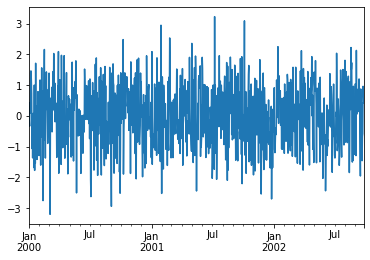

In [203]:
ts.plot()

<AxesSubplot:>

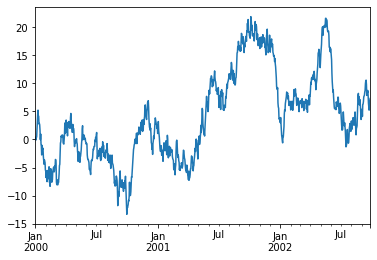

In [204]:
ts.cumsum().plot()

In [205]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,1.261520,0.167444,0.777502,-0.908136
2000-01-02,0.484081,1.122647,-0.489198,1.310879
2000-01-03,0.764666,1.319598,1.176613,-0.944798
2000-01-04,1.378487,1.888987,-0.680342,-0.752147
2000-01-05,0.894348,-1.061797,2.110745,1.074145
...,...,...,...,...
2002-09-22,0.810336,-0.803027,-1.087350,-0.757818
2002-09-23,1.702490,1.862966,-1.246053,-0.500768
2002-09-24,-1.115860,0.157061,0.416421,-1.579590
2002-09-25,0.128416,-0.586443,-0.736478,-0.498537


<AxesSubplot:>

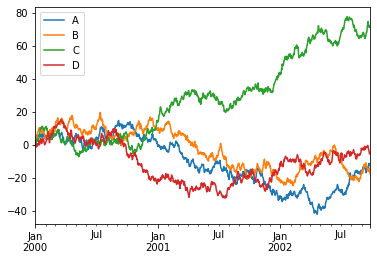

In [206]:
df.cumsum().plot()

## Getting data in/out

## Gotchas

# Gotchas / FAQ

- https://pandas.pydata.org/docs/user_guide/gotchas.html#gotchas

# Cookbook

In [209]:
df = pd.DataFrame({'AAA': [4, 5, 6, 7],
                       'BBB': [10, 20, 30, 40],
                       'CCC': [100, 50, -30, -50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


## Idioms

### if-then columns

In [210]:
df.loc[df.AAA <= 5, ['BBB']] = 0
df.loc[df.AAA > 5, ['BBB']] = 999
df

,AAA,BBB,CCC
0,4,0,100
1,5,0,50
2,6,999,-30
3,7,999,-50


In [212]:
df['BBB'] = df.apply(lambda x: 999 if x.AAA <= 5 else 0, axis=1)
df

,AAA,BBB,CCC
0,4,999,100
1,5,999,50
2,6,0,-30
3,7,0,-50


In [221]:
df['BBB'] = np.where(df.BBB == 999, 0, 999)
df

,AAA,BBB,CCC
0,4,0,100
1,5,0,50
2,6,999,-30
3,7,999,-50


In [218]:
df.where(df >= 999, -1000)

,AAA,BBB,CCC
0,-1000,999,-1000
1,-1000,999,-1000
2,-1000,-1000,-1000
3,-1000,-1000,-1000


### Splitting

In [222]:
df

,AAA,BBB,CCC
0,4,0,100
1,5,0,50
2,6,999,-30
3,7,999,-50


In [223]:
df1 = df[df.AAA <= 5]
df1

,AAA,BBB,CCC
0,4,0,100
1,5,0,50


### Building criteria

In [240]:
df = pd.DataFrame({'AAA': [4, 5, 6, 7],
                      'BBB': [10, 20, 30, 40],
                      'CCC': [100, 50, -30, -50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


#### 選最接近某指定值的 row

In [241]:
c_mean = df['CCC'].mean()
c_mean

17.5

In [243]:
df['abs'] = (df.CCC - c_mean).abs().values
df.sort_values('abs')

,AAA,BBB,CCC,abs
1,5,20,50,32.5
2,6,30,-30,47.5
3,7,40,-50,67.5
0,4,10,100,82.5


In [245]:
df.loc[(df.CCC - c_mean).abs().argsort()]

,AAA,BBB,CCC,abs
1,5,20,50,32.5
2,6,30,-30,47.5
3,7,40,-50,67.5
0,4,10,100,82.5


#### 從多個 filters 動態建立最終 filter 

In [247]:
import functools

In [248]:
f1 = df.AAA >= 5
f2 = df.BBB <= 20
f3 = df.CCC >= 50
df[f1 & f2 & f3]

,AAA,BBB,CCC,abs
1,5,20,50,32.5


In [250]:
f = functools.reduce(lambda x, y: x & y, [f1, f2, f3])
df[f]

,AAA,BBB,CCC,abs
1,5,20,50,32.5


## Selection

In [251]:
df

,AAA,BBB,CCC,abs
0,4,10,100,82.5
1,5,20,50,32.5
2,6,30,-30,47.5
3,7,40,-50,67.5


#### 同時 label + positional 選

In [252]:
df[(df.AAA >= 5) & (df.index.isin([2, 3]))]

,AAA,BBB,CCC,abs
2,6,30,-30,47.5
3,7,40,-50,67.5


#### Ambiguity

In [253]:
data = {'AAA': [4, 5, 6, 7],
            'BBB': [10, 20, 30, 40],
           'CCC': [100, 50, -30, -50]}
df2 = pd.DataFrame(data=data, index=[1, 2, 3, 4])
df2

,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30
4,7,40,-50


In [254]:
df2.iloc[1:3]

,AAA,BBB,CCC
2,5,20,50
3,6,30,-30


In [255]:
df2.loc[1:3]

,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30


#### 用 apply /applymap 動態加入新欄位

In [257]:
df = pd.DataFrame({'AAA': [1, 2, 1, 3],
                       'BBB': [1, 1, 2, 2],
                       'CCC': [2, 1, 3, 1]})
df

,AAA,BBB,CCC
0,1,1,2
1,2,1,1
2,1,2,3
3,3,2,1


In [267]:
cates = dict(zip(range(1, 4), ['apple', 'banana', 'cat']))
df['AAA_cat'] = df[['AAA']].applymap(cates.get)
df

,AAA,BBB,CCC,AAA_cat
0,1,1,2,apple
1,2,1,1,banana
2,1,2,3,apple
3,3,2,1,cat


In [269]:
df['AAA_cat2'] = df.AAA.apply(lambda x: cates.get(x))
df

,AAA,BBB,CCC,AAA_cat,AAA_cat2
0,1,1,2,apple,apple
1,2,1,1,banana,banana
2,1,2,3,apple,apple
3,3,2,1,cat,cat


In [261]:
df[['AAA']].applymap(lambda x: x**2)

,AAA
0,1
1,4
2,1
3,9


In [262]:
df[['AAA']].apply(lambda x: x**2, axis=1)

,AAA
0,1
1,4
2,1
3,9


# DataCamp

# Blog

## 建立 DataFrame

pandas 裡有非常多種可以初始化一個 [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) 的技巧。以下列出一些我覺得實用的初始化方式。

### 用 Python dict 建立 DataFrame

使用 Python 的 `dict` 來初始化 DataFrame 十分直覺。基本上 `dict` 裡頭的每一個鍵值（key）都對應到一個欄位名稱，而其值（value）則是一個 iterable，代表該欄位裡頭所有的數值。

In [2]:
dic = {
    "col 1": [1, 2, 3], 
    "col 2": [10, 20, 30],
    "col 3": list('xyz'),
    "col 4": ['a', 'b', 'c'],
    "col 5": pd.Series(range(3))
}
df = pd.DataFrame(dic)
df

,col 1,col 2,col 3,col 4,col 5
0,1,10,x,a,0
1,2,20,y,b,1
2,3,30,z,c,2


在需要管理多個 DataFrames 時你會想要用更有意義的名字來代表它們，但在資料科學領域裡只要看到 `df`，每個人都會預期它是一個 **D**ata**F**rame，不論是 Python 或是 R 語言的使用者。

很多時候你也會需要改變 DataFrame 裡的欄位名稱：

In [3]:
rename_dic = {"col 1": "x", "col 2": "10x"}
df.rename(rename_dic, axis=1)

,x,10x,col 3,col 4,col 5
0,1,10,x,a,0
1,2,20,y,b,1
2,3,30,z,c,2


這邊也很直覺，就是給一個將舊欄位名對應到新欄位名的 Python `dict`。值得注意的是參數 `axis=1`：在 pandas 裡大部分函式預設處理的軸為列（row）：以 `axis=0` 表示；而將 `axis` 設置為 `1` 則代表你想以行（column）為單位套用該函式。

你也可以用 `df.columns` 的方式改欄位名稱：

In [4]:
df.columns = ['x(new)', '10x(new)'] + list(df.columns[2:])
df

,x(new),10x(new),col 3,col 4,col 5
0,1,10,x,a,0
1,2,20,y,b,1
2,3,30,z,c,2


### 使用 pd.util.testing 隨機建立 DataFrame

當你想要隨意初始化一個 DataFrame 並測試 pandas 功能時，`pd.util.testing` 就顯得十分好用：

In [5]:
pd.util.testing.makeDataFrame().head(10)

,A,B,C,D
xPlIXbQqGU,1.086581,-0.002484,-0.335693,0.226988
IAFe6K8mpA,-0.547556,-0.290935,-0.014313,-0.301007
OoATGY0k2M,1.017636,0.568835,-0.272382,0.659657
uRN2yGacDw,-0.662390,1.929820,-1.206670,0.250626
ElphZli9nK,-0.697235,0.942415,-0.894887,0.701790
oiEoCPCXK8,-1.049284,-1.019107,-0.640271,-0.613056
NUrQFrYQw1,0.759355,0.717367,-0.449368,1.889321
oC9iiEBneW,0.665412,-0.391204,-0.974010,0.248326
4hD6Eea7yF,-0.862819,2.092149,0.976645,-0.388735
3QD5mMfstw,-0.312762,-0.110278,1.162421,-0.335144


`head` 函式預設用來顯示 DataFrame 中前 5 筆數據。要顯示後面數據則可以使用 `tail` 函式。

你也可以用 `makeMixedDataFrame` 建立一個有各種資料型態的 DataFrame 方便測試：

In [6]:
pd.util.testing.makeMixedDataFrame()

,A,B,C,D
0,0.0,0.0,foo1,2009-01-01
1,1.0,1.0,foo2,2009-01-02
2,2.0,0.0,foo3,2009-01-05
3,3.0,1.0,foo4,2009-01-06
4,4.0,0.0,foo5,2009-01-07


其他函式如 `makeMissingDataframe` 及 `makeTimeDataFrame` 在後面的章節都還會看到。

### 將剪貼簿內容轉換成 DataFrame

你可以從 Excel、Google Sheet 或是網頁上複製表格並將其轉成 DataFrame。

簡單 2 步驟：
- 複製其他來源的表格
- 執行 `pd.read_clipboard`

!mp4
- dark
- images/pandas/pandas_clipboard.mp4
- images/pandas/pandas_clipboard.jpg

這個技巧在你想要快速將一些數據轉成 DataFrame 時非常方便。當然，你得考量重現性（reproducibility）。

為了讓未來的自己以及他人可以重現你當下的結果，必要時記得另存新檔以供後人使用：

```python
df.to_csv("some_data.csv")
```

### 讀取線上 CSV 檔

不限於本地檔案，只要有正確的 URL 以及網路連線就可以將網路上的任意 CSV 檔案轉成 DataFrame。

比方說你可以將 Kaggle 著名的[鐵達尼號競賽](https://www.kaggle.com/c/titanic)的 CSV 檔案從網路上下載下來並轉成 DataFrame：

In [7]:
df = pd.read_csv('http://bit.ly/kaggletrain')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


以下則是另個使用 pandas 爬取網路上數據並作分析的真實案例。

我在之前的[ Chartify 教學文](https://leemeng.tw/chartify-a-simple-yet-powerful-python-data-visualization-tool-which-boost-your-productivity-as-a-data-scientist.html)中從臺北市的資料開放平台爬取[ A1 及 A2 類交通事故數據](https://data.taipei/#/dataset/detail?id=2f238b4f-1b27-4085-93e9-d684ef0e2735)後做了簡單匯總：

In [271]:
# 你可以用類似的方式爬取任何網路上的公開數據集
base_url = "https://data.taipei/api/getDatasetInfo/downloadResource?id={}&rid={}"
_id = "2f238b4f-1b27-4085-93e9-d684ef0e2735"
rid = "ea731a84-e4a1-4523-b981-b733beddbc1f"
csv_url = base_url.format(_id, rid)
df_raw = pd.read_csv(csv_url, encoding='big5')

# 複製一份做處理
df = df_raw.copy()

# 計算不同區不同性別的死亡、受傷人數
df['區序'] = df['區序'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
df = (df[df['性別'].isin([1, 2])]
      .groupby(['區序', '性別'])[['死亡人數', '受傷人數']]
      .sum()
      .reset_index()
      .sort_values('受傷人數'))

df['性別'] = df['性別'].apply(lambda x: '男性' if x == 1 else '女性')
df = df.reset_index().drop('index', axis=1)

# 顯示結果
display(df_raw.head())
display(df.head())

,發生年,發生月,發生日,發生時,發生分,處理別,區序,肇事地點,死亡人數,受傷人數,當事人序,車種,性別,年齡,受傷程度,4天候,7速限,8道路型態,9事故位置
0,107,3,29,15,54,2,01大同區,大同區民權西路108號,0,1,1,B03,2,41.0,3.0,8,50,14.0,9.0
1,107,3,29,15,54,2,01大同區,大同區民權西路108號,0,1,2,C03,2,58.0,2.0,8,50,14.0,9.0
2,107,1,7,17,42,2,01大同區,大同區重慶北路2段與南京西路口,0,1,1,B01,1,59.0,3.0,6,40,4.0,2.0
3,107,1,7,17,42,2,01大同區,大同區重慶北路3段與南京西路口,0,1,2,C03,1,18.0,2.0,6,40,4.0,2.0
4,107,1,14,9,56,2,01大同區,大同區承德路3段與民族西路口,0,1,1,C03,1,20.0,2.0,8,50,4.0,1.0


,區序,性別,死亡人數,受傷人數
0,南港區,女性,2,799
1,萬華區,女性,2,1084
2,松山區,女性,30,1146
3,大同區,女性,3,1336
4,士林區,女性,3,1660


有了匯總過後的 DataFrame，你可以用後面[簡易繪圖並修改預設樣式](#簡易繪圖並修改預設樣式)章節提到的 pandas `plot` 函式繪圖。但在這邊讓我用 [Chartify](https://leemeng.tw/chartify-a-simple-yet-powerful-python-data-visualization-tool-which-boost-your-productivity-as-a-data-scientist.html) 展示結果：

```python
import chartify
ch = chartify.Chart(
    x_axis_type='categorical', 
    y_axis_type='categorical')

ch.plot.heatmap(
    data_frame=df, 
    y_column='性別', 
    x_column='區序', 
    color_column='受傷人數', 
    text_column='受傷人數', 
    color_palette='Reds', 
    text_format='{:,.0f}')

(ch.set_title('2017 年台北市各行政區交通意外受傷人數')
 .set_subtitle('性別分計')
 .set_source_label("Data.Taipei")
 .axes.set_xaxis_label('性別')
 .axes.set_yaxis_label('行政區')
 .show('png'))
```

!image
- pandas/read_csv_and_render_using_chartify.png

過來人經驗。雖然像這樣利用 pandas 直接從網路上下載並分析數據很方便，有時 host 數據的網頁與機構（尤其是政府機關）會無預期地修改他們網站，導致數據集的 URL 失效（苦主）。為了最大化重現性，我還是會建議將數據載到本地備份之後，再做分析比較實在。

### 優化記憶體使用量

你可以透過 `df.info` 查看 DataFrame 當前的記憶體用量：

In [8]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 322.0 KB


從最後一列可以看出鐵達尼號這個小 DataFrame 只佔了 322 KB。如果你是透過 [Jupyter 筆記本](https://jupyter.org/)來操作 pandas，也可以考慮用 [Variable Inspector](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/varInspector/README.html) 插件來觀察包含 DataFrame 等變數的大小：

!mp4
- dark
- images/pandas/variable_inspector.mp4
- Variable Inspector

這邊使用的 `df` 不佔什麼記憶體，但如果你想讀入的 DataFrame 很大，可以只讀入特定的欄位並將已知的分類型（categorical）欄位轉成 `category` 型態以節省記憶體（在分類數目較數據量小時有效）：

In [9]:
dtypes = {"Embarked": "category"}
cols = ['PassengerId', 'Name', 'Sex', 'Embarked']
df = pd.read_csv('http://bit.ly/kaggletrain', 
                 dtype=dtypes, usecols=cols)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
PassengerId    891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Embarked       889 non-null category
dtypes: category(1), int64(1), object(2)
memory usage: 134.9 KB


透過減少讀入的欄位數並將 `object` 轉換成 `category` 欄位，讀入的 `df` 只剩 135 KB。只需剛剛的 40 % 記憶體用量。

另外如果你想在有限的記憶體內處理巨大 CSV 檔案，也可以透過 `chunksize` 參數來限制一次讀入的列數（rows）：

In [10]:
from IPython.display import display

# chunksize=4 表示一次讀入 4 筆樣本
reader = pd.read_csv('dataset/titanic-train.csv', 
                     chunksize=4, usecols=cols)
# 秀出前兩個 chunks
for _, df_partial in zip(range(2), reader):
    display(df_partial)

,PassengerId,Name,Sex,Embarked
0,1,"Braund, Mr. Owen Harris",male,S
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C
2,3,"Heikkinen, Miss. Laina",female,S
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,S


,PassengerId,Name,Sex,Embarked
4,5,"Allen, Mr. William Henry",male,S
5,6,"Moran, Mr. James",male,Q
6,7,"McCarthy, Mr. Timothy J",male,S
7,8,"Palsson, Master. Gosta Leonard",male,S


### 讀入並合併多個 CSV 檔案成單一 DataFrame

很多時候因為企業內部 ETL 或是數據處理的方式（比方說[利用 Airflow 處理批次數據](https://leemeng.tw/a-story-about-airflow-and-data-engineering-using-how-to-use-python-to-catch-up-with-latest-comics-as-an-example.html)），相同類型的數據可能會被分成多個不同的 CSV 檔案儲存。

假設在本地端 `dataset` 資料夾內有 2 個 CSV 檔案，分別儲存鐵達尼號上不同乘客的數據：

In [11]:
#ignore
df = pd.read_csv("dataset/titanic-train.csv")
columns = list(df.columns)
# columns = [c for c in columns if c != 'Name']
df.Name = df.Name.apply(lambda x: x.split()[0].replace(',', ''))

df.loc[4:6, columns].to_csv("dataset/passenger1.csv", index=False)
df.loc[12:14, columns].to_csv("dataset/passenger2.csv", index=False)

In [12]:
pd.read_csv("dataset/passenger1.csv")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,5,0,3,Allen,male,35.0,0,0,373450,8.0500,NaN,S
1,6,0,3,Moran,male,NaN,0,0,330877,8.4583,NaN,Q
2,7,0,1,McCarthy,male,54.0,0,0,17463,51.8625,E46,S


另外一個 CSV 內容：

In [13]:
pd.read_csv("dataset/passenger2.csv")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,13,0,3,Saundercock,male,20.0,0,0,A/5. 2151,8.0500,NaN,S
1,14,0,3,Andersson,male,39.0,1,5,347082,31.2750,NaN,S
2,15,0,3,Vestrom,female,14.0,0,0,350406,7.8542,NaN,S


注意上面 2 個 DataFrames 的內容雖然分別代表不同乘客，其格式卻是一模一樣。這種時候你可以使用 `pd.concat` 將分散在不同 CSV 的乘客數據合併成單一 DataFrame，方便之後處理：

In [14]:
from glob import glob
files = glob("dataset/passenger*.csv")

df = pd.concat([pd.read_csv(f) for f in files])
df.reset_index(drop=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,5,0,3,Allen,male,35.0,0,0,373450,8.0500,NaN,S
1,6,0,3,Moran,male,NaN,0,0,330877,8.4583,NaN,Q
2,7,0,1,McCarthy,male,54.0,0,0,17463,51.8625,E46,S
3,13,0,3,Saundercock,male,20.0,0,0,A/5. 2151,8.0500,NaN,S
4,14,0,3,Andersson,male,39.0,1,5,347082,31.2750,NaN,S
5,15,0,3,Vestrom,female,14.0,0,0,350406,7.8542,NaN,S


你還可以使用 `reset_index` 函式來重置串接後的 DataFrame 索引。

前面說過很多 pandas 函式**預設**的 `axis` 參數為 `0`，代表著以**列（row）**為單位做特定的操作。在 `pd.concat` 的例子中則是將 2 個同樣格式的 DataFrames 依照**列**串接起來。

有時候同一筆數據的不同特徵值（features）會被存在不同檔案裡頭。以鐵達尼號的數據集舉例：

In [15]:
#ignore
df = pd.read_csv("dataset/titanic-train.csv")
df.Name = df.Name.apply(lambda x: x.split()[0].replace(',', ''))
df.iloc[:, :4].head().to_csv("dataset/feature_set1.csv", index=False)
df.iloc[:, 4:].head().to_csv("dataset/feature_set2.csv", index=False)

In [16]:
pd.read_csv("dataset/feature_set1.csv")

,PassengerId,Survived,Pclass,Name
0,1,0,3,Braund
1,2,1,1,Cumings
2,3,1,3,Heikkinen
3,4,1,1,Futrelle
4,5,0,3,Allen


除了乘客名稱以外，其他如年齡以及性別等特徵值則被存在另個 CSV 裡頭：

In [17]:
pd.read_csv("dataset/feature_set2.csv")

,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,female,35.0,1,0,113803,53.1000,C123,S
4,male,35.0,0,0,373450,8.0500,NaN,S


假設這 2 個 CSV 檔案裡頭**同列**對應到同個乘客，則你可以很輕鬆地用 `pd.concat` 函式搭配 `axis=1` 將不同 DataFrames 依照**行（column）**串接：

In [18]:
files = glob("dataset/feature_set*.csv")
pd.concat([pd.read_csv(f) for f in files], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,male,35.0,0,0,373450,8.0500,NaN,S


## 客製化 DataFrame 顯示設定

雖然 pandas 會盡可能地將一個 DataFrame 完整且漂亮地呈現出來，有時候你還是會想要改變預設的顯示方式。這節列出一些常見的使用情境。

### 完整顯示所有欄位

有時候一個 DataFrame 裡頭的欄位太多， pandas 會自動省略某些中間欄位以保持頁面整潔：

```python
df = pd.util.testing.makeCustomDataframe(5, 25)
df
```

!image
- dark
- pandas/long_dataframe.jpg

但如果你無論如何都想要顯示所有欄位以方便一次查看，可以透過 `pd.set_option` 函式來改變 `display.max_columns` 設定：

```python
pd.set_option("display.max_columns", None)
df
```

!image
- dark
- pandas/long_full_dataframe.jpg

In [20]:
#ignore
pd.reset_option("display.max_columns")

注意 `...` 消失了。另外你也可以使用 `T` 來轉置（transpose）當前 DataFrame，垂直顯示所有欄位：

```python
# 注意轉置後 `head(15)` 代表選擇前 15 個欄位
df.T.head(15)
```

!image
- dark
- pandas/transposed_dataframe.jpg

這個測試用的 DataFrame 欄位裡頭的 `C` 正代表著 column。你可以在 [pandas 官方文件裡查看其他常用的顯示設定](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#frequently-used-options)。

### 減少顯示的欄位長度

這邊你一樣可以透過 `pd.set_option` 函式來限制鐵達尼號資料集裡頭 `Name` 欄位的顯示長度：

In [135]:
from IPython.display import display
print("display.max_colwidth 預設值：", 
      pd.get_option("display.max_colwidth"))

# 使用預設設定來顯示 DataFrame
df = pd.read_csv('http://bit.ly/kaggletrain')
display(df.head(3))

print("注意 Name 欄位的長度被改變了：")
# 客製化顯示（global）
pd.set_option("display.max_colwidth", 10)
df.head(3)

display.max_colwidth 預設值： 50


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


注意 Name 欄位的長度被改變了：


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund...,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cuming...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikki...,female,26.0,0,0,STON/O...,7.9250,NaN,S


### 改變浮點數顯示位數

除了欄位長度以外，你常常會想要改變浮點數（float）顯示的小數點位數：

In [132]:
pd.set_option("display.precision", 1)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund...,male,22.0,1,0,A/5 21171,7.2,NaN,S
1,2,1,1,Cuming...,female,38.0,1,0,PC 17599,71.3,C85,C
2,3,1,3,Heikki...,female,26.0,0,0,STON/O...,7.9,NaN,S


你會發現 `Fare` 欄位現在只顯示小數點**後一位**的數值了。另外注意剛剛設定的 `max_colwidth` 是會被套用到所有 DataFrame 的。因此這個 DataFrame 的 `Name` 欄位顯示的寬度還跟上個 DataFrame 相同：都被縮減了。

想要將所有調整過的設定初始化，可以執行：

```python
pd.reset_option("all")
```

In [137]:
#ignore
from IPython.display import clear_output
pd.reset_option("all")
clear_output()

其他常用的 options 包含：
- `max_rows`
- `max_columns`
- `date_yearfirst` 

等等。執行 `pd.describe_option()` 可以顯示所有可供使用的 options，但如果你是在 Jupyter 筆記本內使用 pandas 的話，我推薦直接在 `set_option` 函式的括號裡輸入 `Shift` + `tab` 顯示所有選項：

!mp4
- dark
- images/pandas/pd_set_option.mp4

### 為特定 DataFrame 加點樣式

`pd.set_option` 函式在你想要把某些顯示設定套用到**所有** DataFrames 時很好用。不過很多時候你會想要讓不同 DataFrame 有不同的顯示設定或樣式（styling）。

比方說針對下面這個只有 10 筆數據的 DataFrame，你想要跟上一節一樣把 `Fare` 欄位弄成只有小數點後一位，但又不想影響到其他 DataFrame 或是其他欄位：

In [172]:
# 隨機抽樣 10 筆數據來做 styling
df_sample = df.sample(n=10, random_state=9527).drop('Name', axis=1)
df_sample.Age.fillna(int(df.Age.mean()), inplace=True)
df_sample

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
182,183,0,3,male,9.0,4,2,347077,31.3875,NaN,S
376,377,1,3,female,22.0,0,0,C 7077,7.2500,NaN,S
659,660,0,1,male,58.0,0,2,35273,113.2750,D48,C
431,432,1,3,female,29.0,1,0,376564,16.1000,NaN,S
539,540,1,1,female,22.0,0,2,13568,49.5000,B39,C
478,479,0,3,male,22.0,0,0,350060,7.5208,NaN,S
791,792,0,2,male,16.0,0,0,239865,26.0000,NaN,S
303,304,1,2,female,29.0,0,0,226593,12.3500,E101,Q
70,71,0,2,male,32.0,0,0,C.A. 33111,10.5000,NaN,S


這時候你可以使用 [pandas Styler](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html) 底下的 `format` 函式來做到這件事情：

```python
# 一個典型 chain pandas 函式的例子
(df_sample.style
     .format('{:.1f}', subset='Fare')
     .set_caption('★五顏六色の鐵達尼號數據集☆')
     .hide_index()
     .bar('Age', vmin=0)
     .highlight_max('Survived')
     .background_gradient('Greens', 
                          subset='Fare')
     .highlight_null()
)
```

!image
- pandas/pandas_styling.jpg

如果你從來沒有用過 [df.style](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)，這應該是你這輩子看過最繽紛的 DataFrame。

從上而下，上述程式碼對此 DataFrame 做了以下 styling：
- 將 `Fare` 欄位的數值顯示限制到小數後第一位
- 添加一個標題輔助說明
- 隱藏索引（注意最左邊！）
- 將 `Age` 欄位依數值大小畫條狀圖
- 將 `Survived` 最大的值 highlight
- 將 `Fare` 欄位依數值畫綠色的 colormap
- 將整個 DataFrame 的空值顯示為紅色

`pd.DataFrame.style` 會回傳一個 Styler。你已經看到除了 `format` 函式以外，還有很多其他函式可以讓你為 DataFrame 添加樣式。使用 `format` 函式的最大好處是你不需要用像是 `round` 等函式去修改**實際**數值，而只是改變**呈現結果**而已。

熟悉 styling 技巧能讓你不需畫圖就能輕鬆與他人分享簡單的分析結果，也能凸顯你想讓他們關注的事物。小提醒：為了讓你能一次掌握常用函式，我把能加的樣式都加了。實務上你應該思考[什麼視覺變數是必要的](https://leemeng.tw/data-visualization-from-matplotlib-to-ggplot2.html)，而不是盲目地添加樣式。

另外值得一提的是 pandas 函式都會回傳處理後的結果，而不是直接修改原始 DataFrame。這讓你可以輕鬆地把多個函式串（chain）成一個複雜的數據處理 pipeline，但又不會影響到最原始的數據：

In [173]:
df_sample

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
182,183,0,3,male,9.0,4,2,347077,31.3875,NaN,S
376,377,1,3,female,22.0,0,0,C 7077,7.2500,NaN,S
659,660,0,1,male,58.0,0,2,35273,113.2750,D48,C
431,432,1,3,female,29.0,1,0,376564,16.1000,NaN,S
539,540,1,1,female,22.0,0,2,13568,49.5000,B39,C
478,479,0,3,male,22.0,0,0,350060,7.5208,NaN,S
791,792,0,2,male,16.0,0,0,239865,26.0000,NaN,S
303,304,1,2,female,29.0,0,0,226593,12.3500,E101,Q
70,71,0,2,male,32.0,0,0,C.A. 33111,10.5000,NaN,S


瞧！原來的 DataFrame 還是挺淳樸的。注意 `Fare` 欄位裡的小數點並沒有因為剛剛的 styling 而變少，而這讓你在呈現 DataFrame 時有最大的彈性。

## 數據清理 & 整理

這節列出一些十分常用的數據清理與整理技巧，如處理空值（null value）以及切割欄位。

### 處理空值

世界總是殘酷，很多時候手上的 DataFrame 裡頭會有不存在的值，如底下一格格額外顯眼的 `NaN`：

In [21]:
df = pd.util.testing.makeMissingDataframe().head()
df

,A,B,C,D
6bAs9RrtPf,-1.864693,0.395997,-1.057175,1.261987
P4pLVw54w1,0.817813,-0.893529,NaN,NaN
KkhqmjKghu,0.182929,0.892841,1.487175,-1.218580
S4ppq42BKt,1.113693,0.979332,-0.761886,0.026489
Mu2ryPVR0x,0.387857,0.334798,1.321586,NaN


你可以利用 `fillna` 函式將 DataFrame 裡頭所有不存在的值設為 `0`：

In [22]:
df.fillna(0) 

,A,B,C,D
6bAs9RrtPf,-1.864693,0.395997,-1.057175,1.261987
P4pLVw54w1,0.817813,-0.893529,0.000000,0.000000
KkhqmjKghu,0.182929,0.892841,1.487175,-1.218580
S4ppq42BKt,1.113693,0.979332,-0.761886,0.026489
Mu2ryPVR0x,0.387857,0.334798,1.321586,0.000000


當然，這個操作的前提是你確定在當前分析的情境下，將不存在的值視為 `0` 這件事情是沒有問題的。

針對字串欄位，你也可以將空值設定成任何容易識別的值，讓自己及他人明確了解此 DataFrame 的數據品質：

In [23]:
df = pd.util.testing.makeMissingCustomDataframe(nrows=5, 
                                                ncols=4, 
                                                dtype=str)
df.fillna("Unknown")

C0,C_l0_g0,C_l0_g1,C_l0_g2,C_l0_g3
R0,,,,
R_l0_g0,R0C0,R0C1,R0C2,R0C3
R_l0_g1,R1C0,R1C1,R1C2,R1C3
R_l0_g2,R2C0,R2C1,R2C2,R2C3
R_l0_g3,R3C0,Unknown,R3C2,R3C3
R_l0_g4,Unknown,R4C1,R4C2,R4C3


### 捨棄不需要的行列

給定一個初始 DataFrame：

In [24]:
df = pd.util.testing.makeDataFrame().head()
df

,A,B,C,D
87dl3rTYXR,0.048544,0.133999,0.885555,1.164883
DE0ptDHz2Q,0.551378,0.012621,0.256241,0.197140
jiWMAjniDH,-1.275694,-1.473950,-1.602433,-0.286107
45lFb2QT9g,1.348614,2.235074,1.471781,0.449909
OOOtaUhOOp,-0.297613,-1.332934,0.194135,0.654267


你可以使用 `drop` 函式來捨棄不需要的欄位。記得將 `axis` 設為 1：

In [25]:
columns = ['B', 'D']
df.drop(columns, axis=1)

,A,C
87dl3rTYXR,0.048544,0.885555
DE0ptDHz2Q,0.551378,0.256241
jiWMAjniDH,-1.275694,-1.602433
45lFb2QT9g,1.348614,1.471781
OOOtaUhOOp,-0.297613,0.194135


同理，你也可以捨棄特定列（row）：

In [27]:
df.drop('OOOtaUhOOp')

,A,B,C,D
87dl3rTYXR,0.048544,0.133999,0.885555,1.164883
DE0ptDHz2Q,0.551378,0.012621,0.256241,0.197140
jiWMAjniDH,-1.275694,-1.473950,-1.602433,-0.286107
45lFb2QT9g,1.348614,2.235074,1.471781,0.449909


### 重置並捨棄索引

很多時候你會想要重置一個 DataFrame 的索引，以方便使用 `loc` 或 `iloc` **屬性**來存取想要的數據。

給定一個 DataFrame：

In [28]:
df = pd.util.testing.makeDataFrame().head()
df

,A,B,C,D
LI5Y0d3Ygk,0.704950,0.610508,-1.686467,0.165393
9EkrfcGaKh,1.088294,-0.947646,1.382226,-1.410468
Jf891pQjSh,0.137240,1.490714,1.236335,-0.270623
Q9O2vu4Mg1,-0.375816,2.308924,-1.735557,1.734371
z0xoUxOAWW,1.067996,0.474090,-0.492757,-0.042121


你可以使用 `reset_index` 函式來重置此 DataFrame 的索引並輕鬆存取想要的部分：

In [29]:
df.reset_index(inplace=True)
df.iloc[:3, :]
# 豆知識：因為 iloc 是屬性而非函式，
# 因此你得使用 [] 而非 () 存取數據

,index,A,B,C,D
0,LI5Y0d3Ygk,0.704950,0.610508,-1.686467,0.165393
1,9EkrfcGaKh,1.088294,-0.947646,1.382226,-1.410468
2,Jf891pQjSh,0.137240,1.490714,1.236335,-0.270623


將函式的 `inplace` 參數設為 `True` 會讓 pandas 直接修改 `df`。一般來說 pandas 裡的函式並不會修改原始 DataFrame，這樣可以保證原始數據不會受到任何函式的影響。

當你不想要原來的 DataFrame `df` 受到 `reset_index` 函式的影響，則可以將處理後的結果交給一個新 DataFrame（比方說 `df1`）：

In [30]:
df = pd.util.testing.makeDataFrame().head()
df1 = df.reset_index(drop=True)
display(df)
display(df1)

,A,B,C,D
fNMRqfPnw1,0.458255,1.736118,-1.659602,2.325742
xeIJ4tJuxW,-1.102030,1.321306,-0.262345,0.864090
RDAJlNsfDS,1.047750,-0.420285,0.757464,0.384514
kIOVU4EU79,-0.843373,0.235789,-1.211142,0.656130
OKuRXq4eEK,-1.340040,0.674713,0.768126,-0.500718


,A,B,C,D
0,0.458255,1.736118,-1.659602,2.325742
1,-1.102030,1.321306,-0.262345,0.864090
2,1.047750,-0.420285,0.757464,0.384514
3,-0.843373,0.235789,-1.211142,0.656130
4,-1.340040,0.674713,0.768126,-0.500718


透過這樣的方式，pandas 讓你可以放心地對原始數據做任何壞壞的事情而不會產生任何不好的影響。

### 將字串切割成多個欄位

在處理文本數據時，很多時候你會想要把一個字串欄位拆成多個欄位以方便後續處理。

給定一個簡單 DataFrame：

In [31]:
df = pd.DataFrame({
    "name": ["大雄", "胖虎"], 
    "feature": ["膽小, 翻花繩", "粗魯, 演唱會"]
})
df

,name,feature
0,大雄,"膽小, 翻花繩"
1,胖虎,"粗魯, 演唱會"


你可能會想把這個 DataFrame 的 `feature` 欄位分成不同欄位，這時候利用 `str` 將字串取出，並透過 `expand=True` 將字串切割的結果擴大成（expand）成一個 DataFrame：

In [32]:
df[['性格', '特技']] = df.feature.str.split(',', expand=True)
df

,name,feature,性格,特技
0,大雄,"膽小, 翻花繩",膽小,翻花繩
1,胖虎,"粗魯, 演唱會",粗魯,演唱會


注意我們使用 `df[columns] = ...` 的形式將字串切割出來的 2 個新欄位分別指定成 `性格` 與 `特技`。

### 將 list 分成多個欄位

有時候一個欄位裡頭的值為 Python `list`：

In [33]:
df = pd.DataFrame({
    "name": ["大雄", "胖虎"], 
    "feature": [["膽小", "翻花繩"], ["粗魯", "演唱會"]]
})
df

,name,feature
0,大雄,"[膽小, 翻花繩]"
1,胖虎,"[粗魯, 演唱會]"


這時則可以使用 `tolist` 函式做到跟剛剛字串切割相同的效果：

In [34]:
cols = ['性格', '特技']
pd.DataFrame(df.feature.tolist(), columns=cols)

,性格,特技
0,膽小,翻花繩
1,粗魯,演唱會


你也可以使用 `apply(pd.Series)` 的方式達到一樣的效果：

In [35]:
df.feature.apply(pd.Series)

,0,1
0,膽小,翻花繩
1,粗魯,演唱會


遇到以 Python `list` 呈現欄位數據的情境不少，這些函式能讓你少抓點頭。

## 取得想要關注的數據

通常你會需要依照各種不同的分析情境，將整個 DataFrame 裡頭的一部份數據取出並進一步分析。這節內容讓你能夠輕鬆取得想要關注的數據。

### 基本數據切割

在 pandas 裡頭，切割（Slice）DataFrame 裡頭一部份數據出來做分析是稀鬆平常的事情。讓我們再次以鐵達尼號數據集為例：

In [272]:
df = pd.read_csv('http://bit.ly/kaggletrain')
df = df.drop("Name", axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


你可以透過 `loc` 以及 `:` 的方式輕鬆選取從某個起始欄位 C1 到結束欄位 C2 的所有欄位，而無需將中間的欄位一一列出：

In [273]:
df.loc[:3, 'Pclass':'Ticket']

,Pclass,Sex,Age,SibSp,Parch,Ticket
0,3,male,22.0,1,0,A/5 21171
1,1,female,38.0,1,0,PC 17599
2,3,female,26.0,0,0,STON/O2. 3101282
3,1,female,35.0,1,0,113803


### 反向選取行列

透過 Python 常見的 `[::-1]` 語法，你可以輕易地改變 DataFrame 裡頭所有欄位的排列順序：

In [274]:
df.loc[:3, ::-1]

,Embarked,Cabin,Fare,Ticket,Parch,SibSp,Age,Sex,Pclass,Survived,PassengerId
0,S,NaN,7.2500,A/5 21171,0,1,22.0,male,3,0,1
1,C,C85,71.2833,PC 17599,0,1,38.0,female,1,1,2
2,S,NaN,7.9250,STON/O2. 3101282,0,0,26.0,female,3,1,3
3,S,C123,53.1000,113803,0,1,35.0,female,1,1,4


同樣概念也可以運用到列（row）上面。你可以將所有樣本（samples）排序顛倒並選取其中 N 列：

In [275]:
df.iloc[::-1, :5].head()

,PassengerId,Survived,Pclass,Sex,Age
890,891,0,3,male,32.0
889,890,1,1,male,26.0
888,889,0,3,female,NaN
887,888,1,1,female,19.0
886,887,0,2,male,27.0


注意我們同時使用 `:5` 來選出前 5 個欄位。

### 條件選取數據

在 pandas 裡頭最實用的選取技巧大概非遮罩（masking）莫屬了。遮罩讓 pandas 將符合特定條件的樣本回傳：

In [277]:
male_and_age_over_70 = (df.Sex == 'male') & (df.Age > 70)
(df[male_and_age_over_70]
    .style
    .applymap(lambda x: 'background-color: rgb(153, 255, 51)', 
              subset=pd.IndexSlice[:, 'Sex':'Age']))
# 跟 df[(df.Sex == 'male') & (df.Age > 70)] 結果相同

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,male,71,0,0,PC 17754,34.6542,A5,C
116,117,0,3,male,70.5,0,0,370369,7.75,nan,Q
493,494,0,1,male,71,0,0,PC 17609,49.5042,nan,C
630,631,1,1,male,80,0,0,27042,30,A23,S
851,852,0,3,male,74,0,0,347060,7.775,nan,S


`male_and_age_over_70` 是我們定義的一個遮罩，可以把同時符合兩個布林判斷式（大於 70 歲、男性）的樣本選取出來。上面註解有相同效果，但當存在多個判斷式時，有個準確說明遮罩意義的變數（上例的 `male_and_age_over_70`）會讓你的程式碼好懂一點。

另外你也可以使用 `query` 函式來達到跟遮罩一樣的效果：

In [278]:
age = 70
df.query("Age > @age & Sex == 'male'")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,male,74.0,0,0,347060,7.7750,NaN,S


在這個例子裡頭，你可以使用 `@` 來存取已經定義的 Python 變數 `age` 的值。

### 選擇任一欄有空值的樣本

一個 DataFrame 裡常會有多個欄位（column），而每個欄位裡頭都有可能包含空值。

有時候你會想把在**任一**欄位（column）出現過空值的樣本（row）全部取出：

In [283]:
df[df.isnull().any(axis=1)].head() \
    .style.highlight_null()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22,1,0,A/5 21171,7.25,nan,S
2,3,1,3,female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,5,0,3,male,35,0,0,373450,8.05,nan,S
5,6,0,3,male,nan,0,0,330877,8.4583,nan,Q
7,8,0,3,male,2,3,1,349909,21.075,nan,S


這邊剛好所有樣本的 `Cabin` 欄位皆為空值。但倒數第 2 個樣本就算其 `Cabin` 欄不為空值，也會因為 `Age` 欄為空而被選出。

### 選取或排除特定類型欄位

有時候你會想選取 DataFrame 裡特定數據類型（字串、數值、時間型態等）的欄位，這時你可以使用 `select_dtypes` 函式：

In [43]:
df.select_dtypes(include='number').head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


上面我們用一行程式碼就把所有數值欄位取出，儘管我們根本不知道有什麼欄位。而你當然也可以利用 `exclude` 參數來排除特定類型的欄位：

In [287]:
# 建立一個有多種數據形態的 DataFrame
df_mix = pd.util.testing.makeMixedDataFrame()
display(df_mix)
display(df_mix.dtypes)
display(df_mix.select_dtypes(exclude=['datetime64', 'object']))

,A,B,C,D
0,0.0,0.0,foo1,2009-01-01
1,1.0,1.0,foo2,2009-01-02
2,2.0,0.0,foo3,2009-01-05
3,3.0,1.0,foo4,2009-01-06
4,4.0,0.0,foo5,2009-01-07


A           float64
B           float64
C            object
D    datetime64[ns]
dtype: object

,A,B
0,0.0,0.0
1,1.0,1.0
2,2.0,0.0
3,3.0,1.0
4,4.0,0.0


pandas 裡的函式使用上都很直覺，你可以丟入 1 個包含多個元素的 Python `list` 或是單一 `str` 作為參數輸入。

### 選取所有出現在 list 內的樣本

很多時候針對某一個特定欄位，你會想要取出所有出現在一個 `list` 的樣本。這時候你可以使用 `isin` 函式來做到這件事情：

In [45]:
tickets = ["SC/Paris 2123", "PC 17475"]
df[df.Ticket.isin(tickets)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
43,44,1,2,female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
608,609,1,2,female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C
685,686,0,2,male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C
701,702,1,1,male,35.0,0,0,PC 17475,26.2875,E24,S


### 選取某欄位為 top-k 值的樣本

很多時候你會想選取在某個欄位中前 k 大的所有樣本。這時你可以先利用 `value_counts` 函式找出該欄位前 k 多的值：

In [46]:
top_k = 3
top_tickets = df.Ticket.value_counts()[:top_k]
top_tickets.index

Index(['347082', '1601', 'CA. 2343'], dtype='object')

這邊我們以欄位 `Ticket` 為例。另外你也可以使用 [pandas.Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) 裡的 `nlargest` 函式取得相同結果：

In [47]:
df.Ticket.value_counts().nlargest(top_k).index

Index(['347082', '1601', 'CA. 2343'], dtype='object')

接著利用上小節看過的 `isin` 函式就能輕鬆取得 `Ticket`欄位值為前 k 大值的樣本：

In [48]:
df[df.Ticket.isin(top_tickets.index)].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,male,39.0,1,5,347082,31.2750,NaN,S
74,75,1,3,male,32.0,0,0,1601,56.4958,NaN,S
119,120,0,3,female,2.0,4,2,347082,31.2750,NaN,S
159,160,0,3,male,NaN,8,2,CA. 2343,69.5500,NaN,S
169,170,0,3,male,28.0,0,0,1601,56.4958,NaN,S


### 找出符合特定字串的樣本

有時你會想要對一個字串欄位做正規表示式（regular expression），取出符合某個 pattern 的所有樣本。

這時你可以使用 `str` 底下的 `contains` 函式：

In [49]:
df = pd.read_csv('http://bit.ly/kaggletrain')
df[df.Name.str.contains("Mr\.")].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


這邊我們將所有 `Name` 欄位值裡包含 `Mr.` 的樣本取出。注意 `contains` 函式接受的是正規表示式，因此需要將 `.` 轉換成 `\.`。

### 使用正規表示式選取數據

有時候你會想要依照一些規則來選取 DataFrame 裡頭的值、索引或是欄位，尤其是在處理跟時間序列相關的數據：

In [50]:
df_date = pd.util.testing.makeTimeDataFrame(freq='7D')
df_date.head(10)

,A,B,C,D
2000-01-01,-0.143945,-0.020783,1.434651,1.044208
2000-01-08,-0.901508,-1.082932,-1.035743,0.334431
2000-01-15,-1.544868,1.183136,-0.913117,-1.199199
2000-01-22,0.604091,-0.233628,-0.348109,1.082138
2000-01-29,0.062112,1.565870,-0.791369,1.017766
2000-02-05,-0.013661,1.015528,-0.420123,-0.513559
2000-02-12,0.404094,0.486909,-0.815937,0.743381
2000-02-19,-0.288886,2.560776,-0.864528,0.727740
2000-02-26,0.975203,-0.551452,0.531635,-0.595716
2000-03-04,-0.045714,0.137413,2.187056,1.164371


假設你想將所有索引在 2000 年 2 月內的樣本取出，則可以透過 `filter` 函式達成這個目的：

In [51]:
df_date.filter(regex="2000-02.*", axis=0)

,A,B,C,D
2000-02-05,-0.013661,1.015528,-0.420123,-0.513559
2000-02-12,0.404094,0.486909,-0.815937,0.743381
2000-02-19,-0.288886,2.560776,-0.864528,0.727740
2000-02-26,0.975203,-0.551452,0.531635,-0.595716


`filter` 函式本身功能十分強大，有興趣的讀者可以[閱讀官方文件進一步了解其用法](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html)。

### 選取從某時間點開始的區間樣本

在處理時間數據時，很多時候你會想要針對某個起始時間挑出前 t 個時間點的樣本。

讓我們再看一次剛剛建立的 DataFrame：

In [52]:
df_date.head(8)

,A,B,C,D
2000-01-01,-0.143945,-0.020783,1.434651,1.044208
2000-01-08,-0.901508,-1.082932,-1.035743,0.334431
2000-01-15,-1.544868,1.183136,-0.913117,-1.199199
2000-01-22,0.604091,-0.233628,-0.348109,1.082138
2000-01-29,0.062112,1.565870,-0.791369,1.017766
2000-02-05,-0.013661,1.015528,-0.420123,-0.513559
2000-02-12,0.404094,0.486909,-0.815937,0.743381
2000-02-19,-0.288886,2.560776,-0.864528,0.727740


在索引為時間型態的情況下，如果你想要把前 3 週的樣本取出，可以使用 `first` 函式：

In [53]:
df_date.first('3W')

,A,B,C,D
2000-01-01,-0.143945,-0.020783,1.434651,1.044208
2000-01-08,-0.901508,-1.082932,-1.035743,0.334431
2000-01-15,-1.544868,1.183136,-0.913117,-1.199199


十分方便的函式。

## 基本數據處理與轉換

在了解如何選取想要的數據以後，你可以透過這節的介紹來熟悉 pandas 裡一些常見的數據處理方式。這章節也是我認為使用 pandas 處理數據時最令人愉快的部分之一。

### 對某一軸套用相同運算

你時常會需要對 DataFrame 裡頭的每一個欄位（縱軸）或是每一列（橫軸）做相同的運算。

比方說你想將鐵達尼號資料集內的 `Survived` 數值欄位轉換成人類容易理解的字串：

In [194]:
# 重新讀取鐵達尼號數據
df_titanic = pd.read_csv('http://bit.ly/kaggletrain')
df_titanic = df_titanic.drop("Name", axis=1)

# 複製一份副本 DataFrame
df = df_titanic.copy()
columns = df.columns.tolist()[:4]

# 好戲登場
new_col = '存活'
columns.insert(1, new_col)  # 調整欄位順序用
df[new_col] = df.Survived.apply(lambda x: '倖存' if x else '死亡')
df.loc[:5, columns]

,PassengerId,存活,Survived,Pclass,Sex
0,1,死亡,0,3,male
1,2,倖存,1,1,female
2,3,倖存,1,3,female
3,4,倖存,1,1,female
4,5,死亡,0,3,male
5,6,死亡,0,3,male


透過 `apply` 函式，我們把一個匿名函式 `lambda` 套用到整個 `df.Survived` Series 之上，並以此建立一個新的 `存活` 欄位。

值得一提的是當你需要追加新的欄位但又不想影響到原始 DataFrame 時，可以使用 `copy` 函式複製一份副本另行操作。

### 對每一個樣本做自定義運算

上小節我們用 `apply` 函式對 DataFrame 裡頭的**某個 Series **做運算並生成新欄位：

```python
df[new_col] = df.Survived.apply(...
```

不過你時常會想要把樣本（row）裡頭的**多個**欄位一次取出做運算並產生一個新的值。這時你可以自定義一個 Python function 並將 `apply` 函式套用到整個 DataFrame 之上：

In [207]:
df = df_titanic.copy()
display(df.head())

# apply custom function 可以說是 pandas 裡最重要的技巧之一
d = {'male': '男性', 'female': '女性'} 
def generate_desc(row):
    return f"一名 {row['Age']} 歲的{d[row['Sex']]}"

df['描述'] = df.apply(generate_desc, axis=1)
df.loc[:4, 'Sex':]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,描述
0,male,22.0,1,0,A/5 21171,7.2500,NaN,S,一名 22.0 歲的男性
1,female,38.0,1,0,PC 17599,71.2833,C85,C,一名 38.0 歲的女性
2,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,一名 26.0 歲的女性
3,female,35.0,1,0,113803,53.1000,C123,S,一名 35.0 歲的女性
4,male,35.0,0,0,373450,8.0500,NaN,S,一名 35.0 歲的男性


此例中 `apply` 函式將 `generate_desc` 函式**個別**套用到 DataFrame 裡頭的每一個樣本（row），結合 `Sex` 及 `Age` 兩欄位資訊，生成新的 `描述`。

當然，將 `axis` 設置為 `0` 則可以對每一個欄位分別套用自定義的 Python function。 

### 將連續數值轉換成分類數據

有時你會想把一個連續數值（numerical）的欄位分成多個 groups 以方便對每個 groups 做統計。這時候你可以使用 `pd.cut` 函式：

In [290]:
df = df_titanic.copy()

# 為了方便比較新舊欄位
columns = df.columns.tolist()
new_col = '年齡區間'
columns.insert(4, new_col)

# 將 numerical 轉換成 categorical 欄位
labels = [f'族群 {i}' for i in range(1, 11)]
df[new_col] = pd.cut(x=df.Age, 
                     bins=10, 
                     labels=labels)

# 可以排序切割後的 categorical 欄位
(df.sort_values(new_col, ascending=False)
   .reset_index()
   .loc[:5, columns]
)

,PassengerId,Survived,Pclass,Sex,年齡區間,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,631,1,1,male,族群 10,80.0,0,0,27042,30.0000,A23,S
1,852,0,3,male,族群 10,74.0,0,0,347060,7.7750,NaN,S
2,55,0,1,male,族群 9,65.0,0,1,113509,61.9792,B30,C
3,97,0,1,male,族群 9,71.0,0,0,PC 17754,34.6542,A5,C
4,494,0,1,male,族群 9,71.0,0,0,PC 17609,49.5042,NaN,C
5,117,0,3,male,族群 9,70.5,0,0,370369,7.7500,NaN,Q


如上所示，使用 `pd.cut` 函式建立出來的每個分類 `族群 X` 有大小之分，因此你可以輕易地使用 `sort_values` 函式排序樣本。

In [56]:
df[new_col].dtype

CategoricalDtype(categories=['族群 1', '族群 2', '族群 3', '族群 4', '族群 5', '族群 6', '族群 7',
                  '族群 8', '族群 9', '族群 10'],
                 ordered=True)

### 將 DataFrame 隨機切成兩個子集

有時你會想將手上的 DataFrame 隨機切成兩個獨立的子集。選取其中一個子集來訓練機器學習模型是一個常見的情境。

要做到這件事情有很多種方法，你可以使用 [scikit-learn 的 `train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) 或是 numpy 的 `np.random.randn`，但假如你想要純 pandas 解法，可以使用 `sample` 函式：

In [57]:
df_train = df_titanic.sample(frac=0.8, random_state=5566)
df_test = df_titanic.drop(df_train.index)

# 顯示結果，無特殊操作
display(df_train.head())
display(df_test.head())
print('各 DataFrame 大小：', 
      len(df_titanic), len(df_train), len(df_test))

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
294,295,0,3,male,24.0,0,0,349233,7.8958,NaN,S
199,200,0,2,female,24.0,0,0,248747,13.0000,NaN,S
864,865,0,2,male,24.0,0,0,233866,13.0000,NaN,S
625,626,0,1,male,61.0,0,0,36963,32.3208,D50,S
638,639,0,3,female,41.0,0,5,3101295,39.6875,NaN,S


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,male,20.0,0,0,A/5. 2151,8.0500,NaN,S
14,15,0,3,female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,male,2.0,4,1,382652,29.1250,NaN,Q


各 DataFrame 大小： 891 713 178


這個解法的前提是原來的 DataFrame `df_titanic` 裡頭的索引是獨一無二的。另外記得設定 `random_state` 以方便別人重現你的結果。

### 用 SQL 的方式合併兩個 DataFrames

很多時候你會想要將兩個 DataFrames 依照某個共通的欄位（鍵值）合併成單一 DataFrame 以整合資訊。

比方說給定以下兩個 DataFrames：

In [58]:
df_city = pd.DataFrame({
    'state': ['密蘇里州', '亞利桑那州', '肯塔基州', '紐約州'],
    'city': ['堪薩斯城', '鳳凰城', '路易維爾', '紐約市']
})
df_info = pd.DataFrame({
    'city': ['路易維爾', '堪薩斯城', '鳳凰城'],
    'population': [741096, 481420, 4039182],
    'feature': list('abc')})

display(df_city)
display(df_info)

,state,city
0,密蘇里州,堪薩斯城
1,亞利桑那州,鳳凰城
2,肯塔基州,路易維爾
3,紐約州,紐約市


,city,population,feature
0,路易維爾,741096,a
1,堪薩斯城,481420,b
2,鳳凰城,4039182,c


DataFrame `df_city` 包含了幾個美國城市以及其對應的州名（state）；DataFrame `df_info` 則包含城市名稱以及一些數據。如果你想將這兩個 DataFrames 合併（merge），可以使用非常方便的 `merge` 函式：

In [59]:
pd.merge(left=df_city,
         right=df_info,
         how="left", # left outer join
         on="city", # 透過此欄位合併
         indicator=True # 顯示結果中每一列的來源
)

,state,city,population,feature,_merge
0,密蘇里州,堪薩斯城,481420.0,b,both
1,亞利桑那州,鳳凰城,4039182.0,c,both
2,肯塔基州,路易維爾,741096.0,a,both
3,紐約州,紐約市,NaN,NaN,left_only


沒錯，`merge` 函式運作方式就像 [SQL](https://leemeng.tw/why-you-need-to-learn-sql-as-a-data-scientist.html) 一樣，可以讓你透過更改 `how` 參數來做：
- `left`：left outer join
- `right`：right outer join
- `outer`: full outer join
- `inner`： inner join

注意合併後的 DataFrame 的最後一列：因為是 left join，就算右側的 `df_info` 裡頭並沒有紐約市的資訊，我們也能把該城市保留在 `merge` 後的結果。你還可以透過 `indicator=True` 的方式讓 pandas 幫我們新增一個 `_merge` 欄位，輕鬆了解紐約市只存在左側的 `df_city` 裡。

`merge` 函式強大之處在於能跟 SQL 一樣為我們抽象化如何合併兩個 DataFrames 的運算。如果你想要了解 SQL 跟 Python 本質上的差異，可以參考[為何資料科學家需要學習 SQL](https://leemeng.tw/why-you-need-to-learn-sql-as-a-data-scientist.html) 一文。

### 存取並操作每一個樣本

我們前面看過，雖然一般可以直接使用 [`apply` 函式](#對某一軸套用相同運算)來對每個樣本作運算，有時候你就是會想用 for 迴圈的方式把每個樣本取出處理。

這種時候你可以用 `itertuples` 函式：

In [60]:
for row in df_city.itertuples(name='City'):
    print(f'{row.city}是{row.state}裡頭的一個城市')

堪薩斯城是密蘇里州裡頭的一個城市
鳳凰城是亞利桑那州裡頭的一個城市
路易維爾是肯塔基州裡頭的一個城市
紐約市是紐約州裡頭的一個城市


顧名思義，`itertuples` 函式回傳的是 Python [namedtuple](https://docs.python.org/3/library/collections.html#collections.namedtuple)，也是一個你應該已經很熟悉的資料型態：

In [61]:
from collections import namedtuple

City = namedtuple('City', ['Index', 'state', 'city'])
c = City(3, '紐約州', '紐約市')
c == row

True

## 簡單匯總 & 分析數據

在對數據做些基本處理以後，你會想要從手上的 DataFrame 匯總或整理出一些有用的統計數據。本節介紹一些常用的數據匯總技巧。

### 取出某欄位 top k 的值

這你在[選取某欄位為 top-k 值的樣本](#選取某欄位為-top-k-值的樣本)小節應該就看過了。

但因為這個使用情境實在太常出現，讓我們再次嘗試將鐵達尼號數據集裡頭 `Ticket` 欄位最常出現的值取出：

In [292]:
df = df_titanic.copy()
display(df.head())
display(df.Ticket.value_counts().head(5).reset_index())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


,index,Ticket
0,347082,7
1,1601,7
2,CA. 2343,7
3,3101295,6
4,CA 2144,6


`value_counts` 函式預設就會把欄位裡頭的值依照出現頻率**由高到低**排序，因此搭配 `head` 函式就可以把最常出現的 top k 值選出。

### 一行描述數值欄位

當你想要快速了解 DataFrame 裡所有數值欄位的統計數據（最小值、最大值、平均和中位數等）時可以使用 `describe` 函式：

In [175]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


你也可以用[取得想要關注的數據](#取得想要關注的數據_1)一節的技巧來選取自己關心的統計數據：

In [64]:
df.describe().loc[['mean', 'std'], 'Survived':'Age']

,Survived,Pclass,Age
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497


### 找出欄位裡所有出現過的值

針對特定欄位使用 `unique` 函式即可：

In [65]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

### 分組匯總結果

很多時候你會想要把 DataFrame 裡頭的樣本依照某些特性分門別類，並依此匯總各組（group）的統計數據。這種時候你可以用 `groupby` 函式。

讓我們再次拿出鐵達尼號數據集：

In [208]:
df = df_titanic.copy()
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


你可以將所有乘客（列）依照它們的 `Pclass` 欄位值分組，並計算每組裡頭乘客們的平均年齡：

In [177]:
df.groupby("Pclass").Age.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

你也可以搭配剛剛看過的 `describe` 函式來匯總各組的統計數據：

In [68]:
df.groupby("Sex").Survived.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


你也可以依照多個欄位分組，並利用 `size` 函式迅速地取得各組包含的樣本數：

In [69]:
df.groupby(["Sex", 'Pclass']).size().unstack()

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


你也可以用 `agg` 函式（**agg**regate，匯總）搭配 `groupby` 函式來將每一組樣本依照多種方式匯總：

In [209]:
df.groupby(["Sex", 'Pclass']).Age.agg(['min', 'max', 'count'])

min   max  count
Sex    Pclass                   
female 1       2.00  63.0     85
       2       2.00  57.0     74
       3       0.75  63.0    102
male   1       0.92  80.0    101
       2       0.67  70.0     99
       3       0.42  74.0    253

透過 `unstack` 函式能讓你產生跟 `pivot_table` 函式相同的結果：

In [210]:
df.groupby(["Sex", 'Pclass']).Age.agg(['min', 'max', 'count']).unstack()

min               max             count         
Pclass     1     2     3     1     2     3     1   2    3
Sex                                                      
female  2.00  2.00  0.75  63.0  57.0  63.0    85  74  102
male    0.92  0.67  0.42  80.0  70.0  74.0   101  99  253

當然，你也可以直接使用 `pivot_table` 函式來匯總各組數據：

In [211]:
df.pivot_table(index='Sex', 
               columns='Pclass', 
               values='Age', 
               aggfunc=['min', 'max', 'count'])

min               max             count         
Pclass     1     2     3     1     2     3     1   2    3
Sex                                                      
female  2.00  2.00  0.75  63.0  57.0  63.0    85  74  102
male    0.92  0.67  0.42  80.0  70.0  74.0   101  99  253

依照背景不同，每個人會有偏好的 pandas 使用方式。選擇對你來說最直覺又好記的方式吧！

### 結合原始數據與匯總結果

不管是上節的 `groupby` 搭配 `agg` 還是 `pivot_table`，匯總結果都會以另外一個全新的 DataFrame 表示。

有時候你會想直接把各組匯總的結果放到原本的 DataFrame 裡頭，方便比較原始樣本與匯總結果的差異。這時你可以使用 `transform` 函式：

In [221]:
df = df_titanic.copy()
df['Avg_age'] = df.groupby("Sex").Age.transform("mean")
df['Above_avg_age'] = df.apply(lambda x: 'yes' if x.Age > x.Avg_age else 'no', 
                               axis=1)
# styling
(df.loc[:4, 'Sex':]
 .style
 .highlight_max(subset=['Avg_age'])
 .applymap(lambda x: 'background-color: rgb(153, 255, 51)', 
           subset=pd.IndexSlice[[0, 4], ['Age', 'Above_avg_age']])
)

,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Avg_age,Above_avg_age
0,male,22,1,0,A/5 21171,7.25,nan,S,30.7266,no
1,female,38,1,0,PC 17599,71.2833,C85,C,27.9157,yes
2,female,26,0,0,STON/O2. 3101282,7.925,nan,S,27.9157,no
3,female,35,1,0,113803,53.1,C123,S,27.9157,yes
4,male,35,0,0,373450,8.05,nan,S,30.7266,yes


此例將所有乘客依照性別 `Sex` 分組之後，計算各組的平均年齡 `Age`，並利用 `transform` 函式將各組結果插入對應的乘客（列）裡頭。你會發現兩名男乘客跟平均男性壽命 `Avg_age` 欄位相比正好一上一下，這差異則反映到 `Above_avg_age` 欄位裡頭。

### 對時間數據做匯總

給定一個跟時間相關的 DataFrame：

In [74]:
df_date = pd.util.testing.makeTimeDataFrame(freq='Q').head(10) * 10
df_date

,A,B,C,D
2000-03-31,-20.465499,-5.402825,4.790400,-6.949846
2000-06-30,-3.573217,2.091491,12.725446,-10.215842
2000-09-30,-3.377268,3.600146,13.607341,6.309234
2000-12-31,-11.181567,-16.471324,8.659892,5.619725
2001-03-31,7.148111,8.887097,-0.117279,-1.628799
2001-06-30,9.765045,-1.160198,4.898406,12.054339
2001-09-30,-8.067456,-9.746304,-12.500050,-8.970445
2001-12-31,-3.300273,-11.148755,-13.194654,12.852938
2002-03-31,-6.421518,12.420474,-3.546766,20.694348
2002-06-30,11.967359,9.522958,1.557142,-2.778456


你可以利用 `resample` 函式來依照不同時間粒度匯總這個時間 DataFrame：

In [216]:
(df_date.resample('Y').A.max()
 .reset_index()
 .rename({'index': 'year'}, axis=1)
)

,year,A
0,2000-12-31,-3.377268
1,2001-12-31,9.765045
2,2002-12-31,11.967359


此例中將不同年份（**Y**ear）的樣本分組，並從每一組的欄位 `A` 中選出最大值。你可以查看[官方 resampling 說明文件](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling)來了解還有什麼時間粒度可以選擇（分鐘、小時、月份等等）。

另外小細節是你可以利用 [numpy 的 broadcasting 運算](https://numpy.org/devdocs/user/theory.broadcasting.html)輕鬆地將 DataFrame 裡的所有數值做操作（初始 `df_date` 時的用到的 `* 10`）。

### 簡易繪圖並修改預設樣式

在 Python 世界裡有很多數據視覺化工具供你選擇，比方說經典的 [Matplotlib](https://matplotlib.org/) 以及在[淺談神經機器翻譯一文](https://leemeng.tw/neural-machine-translation-with-transformer-and-tensorflow2.html)中被我拿來視覺化矩陣運算的 [Seaborn](https://seaborn.pydata.org/)。你也可以使用前面看過的 [Chartify](https://leemeng.tw/chartify-a-simple-yet-powerful-python-data-visualization-tool-which-boost-your-productivity-as-a-data-scientist.html) 搭配 pandas 畫出美麗圖表。

但有時，你只需要 pandas 內建的 `plot` 函式就能輕鬆地將一個 DataFrame 轉成統計圖：

```python
# 用 `plot` 一行畫圖。前兩行只是改變預設樣式
import matplotlib.pyplot as plt
plt.style.use("ggplot")
df.groupby("Pclass").Survived.count().plot("barh");
```

!image
- dark
- pandas/pandas_plot.jpg

我們都是視覺動物，pandas 的 `plot` 函式讓你在進行[探索型數據分析（**E**xploratory **D**ata **A**nalysis, EDA）](https://en.wikipedia.org/wiki/Exploratory_data_analysis)、試著快速了解手上數據集時十分方便。我們在[淺談資料視覺化以及 ggplot2 實踐](https://leemeng.tw/data-visualization-from-matplotlib-to-ggplot2.html)一文也已經探討過類似概念：

<br/>

!image
- dark
- ggplot2/data-vis-purpose.png
- 在做 EDA 時只需要包含最重要且你自己能夠解讀的視覺變數，重點是效率
- https://leemeng.tw/data-visualization-from-matplotlib-to-ggplot2.html

<br/>

另外 pandas 底層預設使用 Matplotlib 繪圖，而用過 Matplotlib 的人都知道其初始的繪圖樣式實在不太討喜。你可以透過 `plt.style.available` 查看所有可供使用的繪圖樣式（style），並將喜歡的樣式透過 `plt.style.use()` 套用到所有 DataFrames 的 `plot` 函式：

In [206]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

## 與 pandas 相得益彰的實用工具

前面幾個章節介紹了不少 pandas 的使用技巧與操作概念，這節則介紹一些我認為十分適合跟 pandas 一起搭配使用的數據工具 / 函式庫。在說明每個工具的功能時，我都會使用你已經十分熟悉的鐵達尼號數據集作為範例 DataFrame：

In [231]:
df = df_titanic.copy()
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


### [tqdm](https://github.com/tqdm/tqdm)：了解你的數據處理進度

[tqdm](https://github.com/tqdm/tqdm) 是一個十分強大的 Python 進度條工具，且有[整合 pandas](https://github.com/tqdm/tqdm#pandas-integration)。此工具可以幫助我們了解 DataFrame `apply` 函式的進度。回想一下我們在[對某一軸套用相同運算](#對某一軸套用相同運算)一節做的一個簡單 `apply` 運算：

In [244]:
df['存活'] = df.Survived.apply(lambda x: '倖存' if x else '死亡')
df.loc[:5, 'Survived':'存活']

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,存活
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,死亡
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,倖存
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,倖存
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,倖存
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,死亡
5,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,死亡


在這個不到 1,000 筆的 DataFrame 做這樣的簡單運算不用一秒鐘，但實務上你可能常常需要對幾十萬、幾百萬筆數據分別做複雜的運算，這時候了解執行進度就是一件非常重要的事情。首先透過 [Anaconda](https://www.anaconda.com/) 安裝 tqdm：

```bash
conda install -c conda-forge tqdm 
```


如果你是在 Juypter 筆記本裡執行 pandas，可以用以下的方式將 tqdm 進度條整合到 `apply` 函式：

```python
from tqdm import tqdm_notebook
tqdm_notebook().pandas()
clear_output()

# 只需將 `apply` 替換成 `progress_apply`
df['存活'] = df.Survived.progress_apply(lambda x: '倖存' if x else '死亡')
df.loc[:5, 'Survived':'存活']
```

In [246]:
#ignore
from tqdm import tqdm_notebook
tqdm_notebook().pandas()
df['存活'] = df.Survived.progress_apply(lambda x: '倖存' if x else '死亡')
clear_output()

!image
- dark
- pandas/tqdm_progress_apply.jpg

透過使用 `progress_apply` 函式，我們可以得到跟使用 `apply` 函式一樣的結果，附贈進度條。相信我，在你 `apply` 的函式很複雜且樣本數很大時，你會很感謝有進度條的存在。你可以查看 [tqdm repo](https://github.com/tqdm/tqdm) 了解更多使用案例：

!image
- dark
- pandas/tqdm-jupyter-1.gif

### [swifter](https://github.com/jmcarpenter2/swifter)：加速你的數據處理

[swifter](https://github.com/jmcarpenter2/swifter) 函式庫能以最有效率的方式執行 `apply` 函式。同樣可以使用 Anaconda 安裝：

```bash
conda install -c conda-forge swifter
```

接著讓我建立一個有 100 萬筆樣本的 DataFrame ，測試 swifter 與原版 `apply` 函式的效能差異：

In [247]:
import swifter
df = pd.DataFrame(pd.np.random.rand(1000000, 1), columns=['x'])

%timeit -n 10 df['x2'] = df['x'].apply(lambda x: x**2)
%timeit -n 10 df['x2'] = df['x'].swifter.apply(lambda x: x**2)

240 ms ± 5.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
5 ms ± 565 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


在這個簡單的平方運算中，swifter 版的 `apply` 函式在我的 mac 上的效率是原始 `apply` 函式的 48 倍。而要使用 swifter 你也只需要加上 `swifter` 關鍵字即可，何樂而不為？

喔別擔心，剛剛的 tqdm 進度條仍然會繼續顯示：

```python
df = pd.DataFrame(pd.np.random.rand(100000, 1), columns=['x'])
df['x2'] = df['x'].swifter.apply(lambda x: x**2)
```

!image
- dark
- pandas/swifter_with_tqdm.png

魚與熊掌兩者皆得。

### [qgrid](https://github.com/quantopian/qgrid)：即時排序、篩選及編輯你的 DataFrame

[qgrid](https://github.com/quantopian/qgrid) 是一個能讓你在 Jupyter 筆記本裡使用簡單 UI 瀏覽並操作 DataFrame 的 widget。一樣透過 Anaconda 安裝：

```bash
conda install -c tim_shawver qgrid
jupyter nbextension enable --py --sys-prefix widgetsnbextension
```

實際的使用方式也非常簡單：

```python
import qgrid
qgrid.set_grid_option('maxVisibleRows', 7)
q = qgrid.show_grid(df_titanic)
q
```

!mp4
- dark
- images/pandas/qgrid_demo.mp4

你可以簡單瀏覽 DataFrame 內容，也能依照欄位值篩選及排序樣本，甚至編輯裡頭的值。

如果你想要取得當前狀態的 DataFrame，也能使用 qgrid 裡頭的 `get_changed_df` 函式：

```python
# 取得更改後的 DataFrame
df_changed = q.get_changed_df()

# styling
(df_changed.iloc[:8, :]
 .style
 .applymap(lambda x: 'color:red',
           subset=pd.IndexSlice[829, 'SibSp'])
)
```

!image
- dark
- pandas/qgrid_get_changed_df.png

注意我剛剛在 qgrid 裡頭將 `0` 改成 `2`，而這個變動被反映到新的 DataFrame `df_changed` 裡頭。

### [pandas-profiling](https://github.com/pandas-profiling/pandas-profiling)：你的一鍵 EDA 神器

廢話不多說，先附上安裝指令：

```bash
conda install -c conda-forge pandas-profiling
```

當碰到新的資料集時，你常會需要做 EDA 來探索並了解手上的數據。常見的基礎步驟有：
- 隨機抽樣 DataFrame 並用肉眼觀察樣本
- 了解樣本數有多少、各類型的變數有多少
- 了解 DataFrame 裡有多少空值
- 看數值欄位的分佈，欄位之間的相關係數
- 看分類型欄位的有多少不同的值，分佈為何

等等。這些在你熟悉本文的 pandas 技巧以後都應該跟吃飯喝水一樣，但很多時候就是例行公事。

這時你可以使用 [pandas-profiling](https://github.com/pandas-profiling/pandas-profiling) 讓它自動產生簡單報表，總結 DataFrame 裡的數據性質：

```python
import pandas_profiling
df = df_titanic.copy()

# 一行報表：將想觀察的 DataFrame 丟進去就完工了
pandas_profiling.ProfileReport(df)
```

!mp4
- dark
- images/pandas/pandas_profiling.mp4

有了自動生成的數據分析報表，你不再需要自己寫繁瑣的程式碼就能「健檢」手上的數據集。這讓你能對數據更快地展開 domain-specific 的研究與分析，大大提升效率。

## 結語：實際運用所學

呼！本文的 pandas 旅程到此告一段落啦！

我想在其他地方你應該是找不到跟本文一樣囉哩八唆的 pandas 教學文章了。本文雖長，但涵蓋的都是我認為十分實用的 pandas 使用手法，希望你有從中學到些東西，並開始自己的數據處理與分析之旅。如果你之後想要複習，可以點開頁面左側的章節傳送門，測試自己還記得多少技巧。

接下來最重要的是培養你自己的 pandas **肌肉記憶**：重複應用你在本文學到的東西，分析自己感興趣的任何數據並內化這些知識。

!image
- pandas/danial-ricaros-FCHlYvR5gJI-unsplash.jpg
- Now it's your show time

pandas 是一個非常強大的資料處理工具，本文雖長，仍無法涵蓋所有東西。不過你現在已經學會作為一個資料科學家所需要的所有基礎 pandas 手法。除了多加練習找手感以外，我能給你的最後一個建議就是在 Jupyter 筆記本裡頭多加利用 `Shift` + `tab` 查看 pandas 函式的 documentation，很多時候你會有新的發現。

如果你有任何其他 pandas 技巧，也請不吝留言與我分享！我懂的技巧不多，而現在輪到你教我了：）

In [ ]:
#ignore
- output
    - windows friendly output: `to_csv(encoding="cp932")`
- powerful tools
    - Facets
        - https://www.evernote.com/l/AETaGMqtguRAKbEF9z4hWtF9HazEVkWr70c
    - cufflinks and plotly
        - https://www.kdnuggets.com/2019/07/10-simple-hacks-speed-data-analysis-python.html

- post-release
    - 修改 chartify 連結，連回 pandsa 文章
    - 檢查 pandas 文內 chartify 以及 ggplot 的連結對不對
